In [23]:
def to_npz(filepath, outpath, x_cols, y_cols):
    df = pd.read_csv(filepath)
    t = []
    y = []
    for _, v in df.iterrows():
        t.append(v[x_cols].to_numpy())
        y.append(v[y_cols].to_numpy())

    np.savez(outpath, t=t, y=y)

In [24]:
def abetaODE(y0, a, b, time):
    # abetaODE(numIter,A,B,C,D,E
    # numIter - total number of initial conditions to simulate
    # A,B,C,D,E - relative concentration IC seedings of B1', Bn, Bn', Bm, Bm'

    # define the model parameters

    a1, a2, a3, a4, a5 = a
    b1, b2, b3, b4, b5, b6 = b

    # initialize initial condition, and bridge rate loops

    # Define the system of equations
    def f(y, t):
        # y is initial condition vector
        # t is time grid
        B1t = y[0]
        B1pt = y[1]
        Bnt = y[2]
        Bnpt = y[3]
        Bmt = y[4]
        Bmpt = y[5]

        B1_t = n * a1 * Bnt - n * a2 * pow(B1t, n) + B1pt - a3 * B1t
        B1p_t = n * b1 * Bnpt - n * b2 * pow(B1pt, n) + a3 * B1pt - B1pt
        Bn_t = a2 * pow(B1t, n) - a1 * Bnt + (m / n) * a5 * Bmt + b4 * Bnpt - a4 * Bnt - (
                    m / n) * b3 * pow(Bnt, (m / n))
        Bnp_t = b2 * pow(B1pt, n) - b1 * Bnpt + a4 * Bnt + (m / n) * b5 * Bmpt - (m / n) * b6 * pow(
            Bnpt, (m / n)) - b4 * Bnpt
        Bm_t = b3 * pow(Bnt, (m / n)) - a5 * Bmt
        Bmp_t = b6 * pow(Bnpt, (m / n)) - b5 * Bmpt

        return [B1_t, B1p_t, Bn_t, Bnp_t, Bm_t, Bmp_t]

    soln = odeint(f, y0, time)  # solve the system of equations

    # extract solution for each agent
    df_dict = {
        't': time,
        'B1': soln[:, 0],
        'B1p': soln[:, 1],
        'Bn': soln[:, 2],
        'Bnp': soln[:, 3],
        'Bm': soln[:, 4],
        'Bmp': soln[:, 5]
    }

    df = pd.DataFrame.from_dict(df_dict, orient='index').transpose()

    df.to_csv('sim_abeta.csv', index=False)
    to_npz('sim_abeta.csv', 'sim_abeta.npz', x_cols=['t'], y_cols=['B1', 'B1p', 'Bn', 'Bnp', 'Bm', 'Bmp'])

    return df

In [25]:
# INSANELY stiff mechanics - B1p jumps from 2 to 45 within .00000003 t,
# then back down to 0.5 within the same timestep
#

In [26]:
forward_rates = [a2, b2, b3, b6]

In [27]:
n, m = np.float64([12.0, 24.0])

max_time = 200.0
num_rows = 1000

In [28]:
actual_consts = [0.001, 1.0, 1.0, 1.0, 0.0001, 0.005, 10.0, 1.0, 1.0, 0.005, 10.0]

In [33]:
pred_consts = {
    'sqrt': [4.86e-01/1000, 4.86e-01, 1, 1, 5.64e+00/10000, 2.30e-05/2000, 2.30e-05, 5.64e+00, 1, 4.37e-05/2000, 4.37e-05],
    'pcwise': [1.55e+00, 5.47e-01, 5.33e-02, -4.22e-01, -2.12e+00, 4.52e-01, 1.01e+00, 4.50e+00, -3.23e-01, -8.42e-03, 1.64e+01],
    'loglog': [2.45e+00, 4.90e-02, 1.65e-01, -1.25e+00, -3.66e+00, 8.66e-01, 9.88e-01, 1.44e+00, -1.33e+00, -1.28e+00, 1.25e+01],
    'log': [1.87e+00, 6.09e-01, 4.10e-02, -7.30e-03, 2.35e+00, 6.28e-02, 1.02e+00, 6.08e+00, -1.66e-01, 1.17e-01, 1.62e+01],
    'linear': [5.93e-01, 9.17e-01, 1.27e-01, -1.97e-01, -8.52e-02, 3.10e-01, 1.00e+00, 3.56e+00, -1.64e-01, 3.96e-02, 1.41e+01]
}

In [34]:
all_init_vals = np.float64([
    [1, 0, 0, 0, 0, 0],
    [1, 1.5, 0, 0, 0, 0],
    [1, 0, 1.5, 0, 0, 0],
    [1, 0, 0, 1.5, 0, 0],
    [1, 0, 0, 0, 1.5, 0],
    [1, 0, 0, 0, 0, 1.5],
    # [1, 1, 1, 1, 1, 1],
    [1, 1.5, 1.5, 1.5, 1.5, 1.5]
])

In [35]:
ts='sqrt'

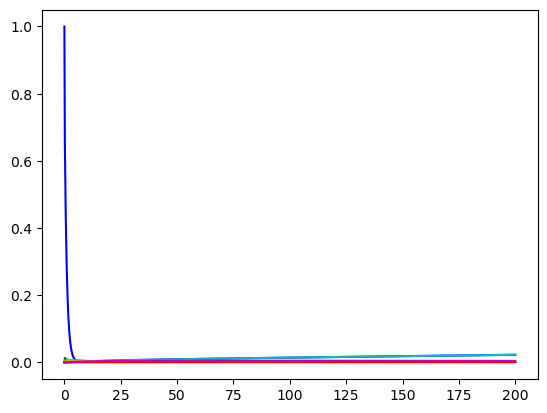

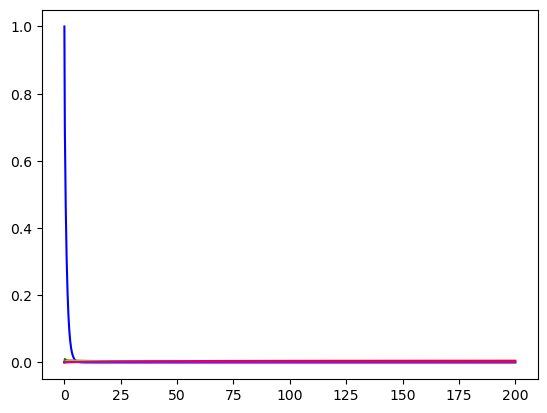

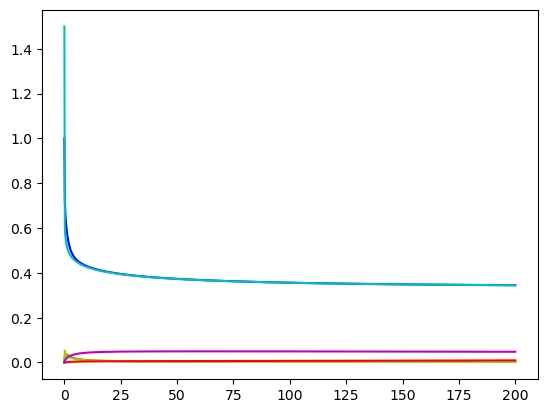

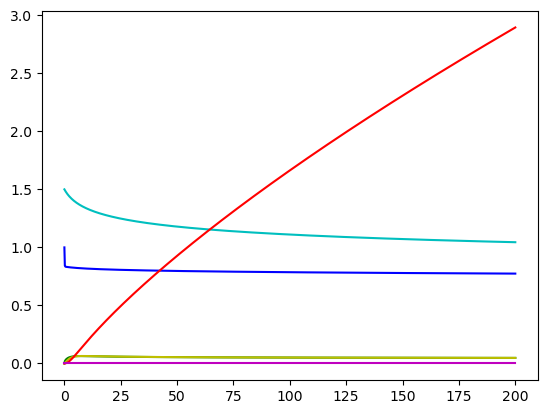

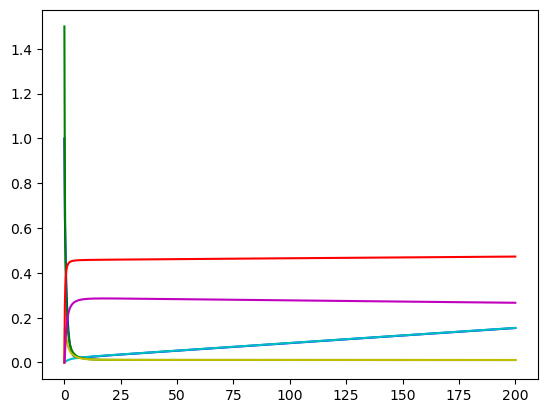

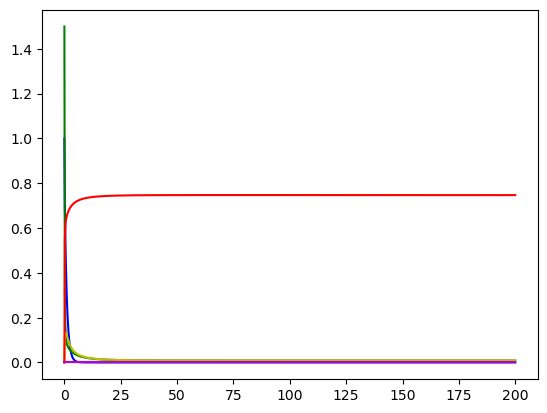

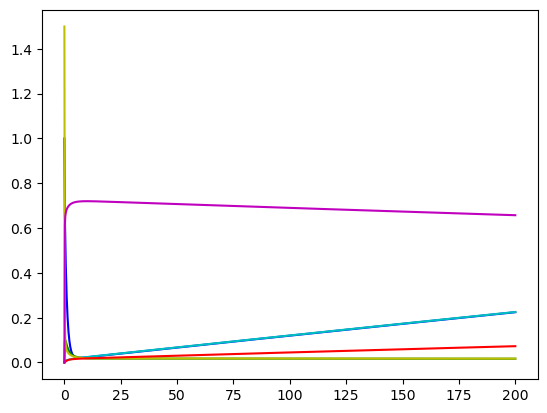

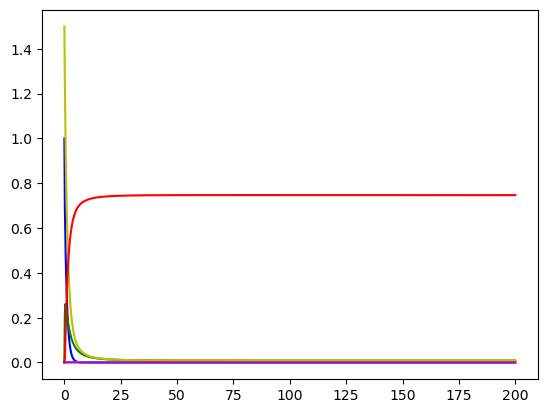

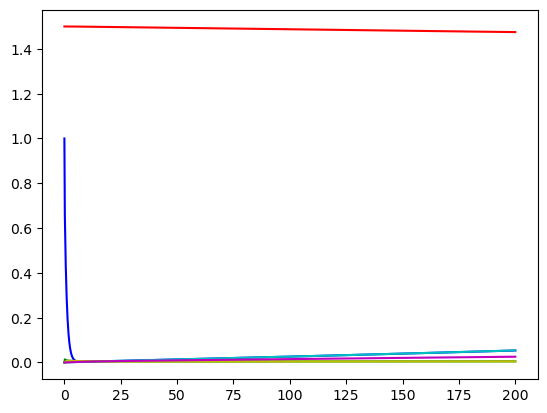

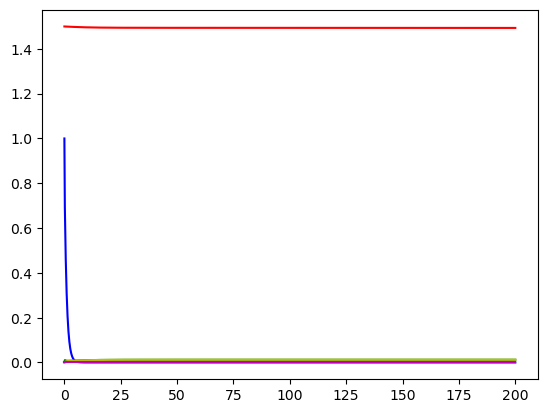

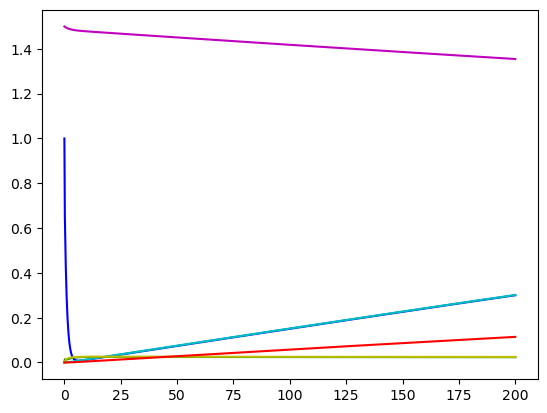

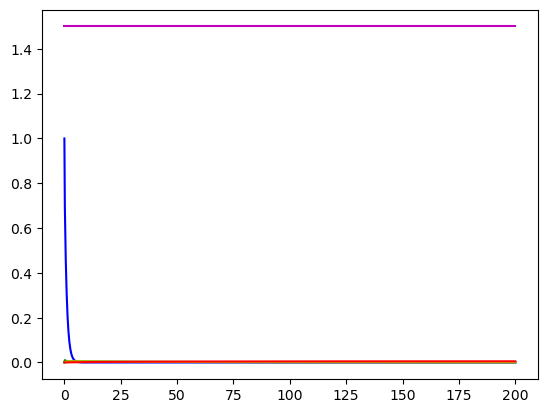

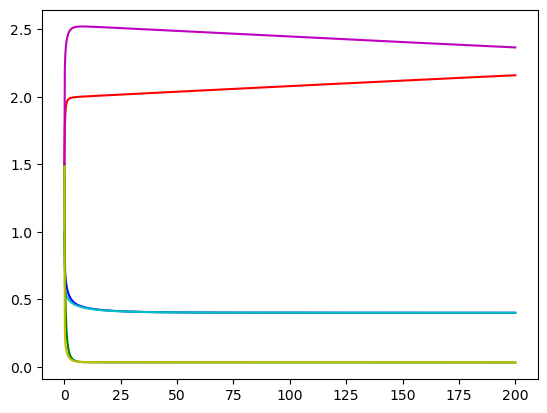

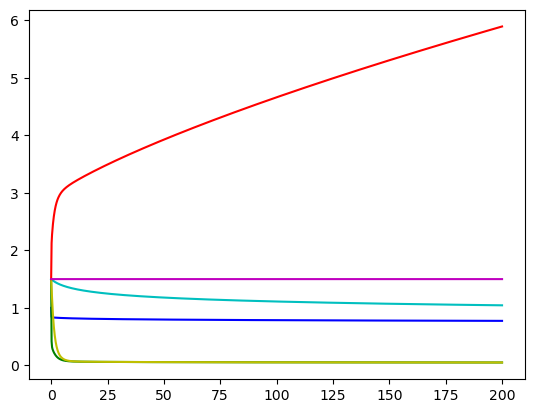

In [36]:
species = {'B1':'b','B1p':'c','Bn':'g','Bnp':'y','Bm':'r','Bmp':'m'}

for ind, iv in enumerate(all_init_vals):
    pred_data = abetaODE(iv, pred_consts[ts][:5], pred_consts[ts][5:], time=np.linspace(0, max_time, num_rows))
    true_data = abetaODE(iv, actual_consts[:5], actual_consts[5:], time=np.linspace(0, max_time, num_rows))
    plt.figure(ind*2)

    for name, i in true_data.iloc[:,true_data.columns!='t'].items():
    #     i = np.array(i)
    #     d_t = np.diff(i)
    #     absval = np.abs(d_t)
    #     scaled = np.interp(absval, (absval.min(), absval.max()), (0, 1200))
        plt.plot(list(true_data.t), i, color=species[name], label=name)
    plt.figure(ind*2+1)
    for name, i in pred_data.iloc[:,pred_data.columns!='t'].items():
    #     arr = np.array(i)
    #     zp = zip(arr, np.array(pred_data.t))

    #     zp = [x for x in zp if (x[0]<=2 and x[0]>=0)]
    #     arr, time = zip(*zp)
    #     plt.plot(time, arr, color=species[name], label=name)

        plt.plot(list(pred_data.t), list(i), color=species[name], label=name)

In [ ]:
# scale data such that the antiderivative of data from 0 to 10 equals 1200

In [2]:
import deepxde.deepxde as dde

In [5]:
from abeta import six_species_equations, boundary
from abeta import load_training_data
from abeta import abetaODE

In [16]:
from abeta import layers, geom, activation

In [19]:
ic = all_init_vals[2]
at, bt = actual_consts[:5], actual_consts[5:]
step = np.square(np.linspace(0, np.sqrt(max_time), num_rows))
abetaODE(ic, at, bt, step)
data_path = 'sim_abeta.npz'
ob_t, ob_y = load_training_data(data_path)

ic1 = dde.icbc.IC(geom, lambda X: ic[0], boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda X: ic[1], boundary, component=1)
ic3 = dde.icbc.IC(geom, lambda X: ic[2], boundary, component=2)
ic4 = dde.icbc.IC(geom, lambda X: ic[3], boundary, component=3)
ic5 = dde.icbc.IC(geom, lambda X: ic[4], boundary, component=4)
ic6 = dde.icbc.IC(geom, lambda X: ic[5], boundary, component=5)

ob_y1 = dde.icbc.PointSetBC(ob_t, ob_y[:, 0:1], component=0)
ob_y2 = dde.icbc.PointSetBC(ob_t, ob_y[:, 1:2], component=1)
ob_y3 = dde.icbc.PointSetBC(ob_t, ob_y[:, 2:3], component=2)
ob_y4 = dde.icbc.PointSetBC(ob_t, ob_y[:, 3:4], component=3)
ob_y5 = dde.icbc.PointSetBC(ob_t, ob_y[:, 4:5], component=4)
ob_y6 = dde.icbc.PointSetBC(ob_t, ob_y[:, 5:6], component=5)
data = dde.data.PDE(
    geom,
    six_species_equations,
    [ic1, ic2, ic3, ic4, ic5, ic6, ob_y1, ob_y2, ob_y3, ob_y4, ob_y5, ob_y6],
    num_domain=1149,
    num_boundary=1,
    anchors=ob_t,
    num_test=int(num_rows * (8 / 10))
)
network = dde.nn.FNN(layers, activation, 'Glorot uniform')

model = dde.Model(data, network)

In [20]:
model.restore('model_with_constraints/model/nonneg_constr-175000.pt')

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.